In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [118]:
heart = pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [119]:
o2_saturation = pd.read_csv("o2Saturation.csv")
o2_saturation.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [120]:
heart = heart.merge(o2_saturation, left_index=True, right_index=True)
heart.rename(columns = {'98.6':'Oxygen'}, inplace = True)
heart.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Oxygen
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


In [121]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Oxygen
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'cp'}>,
        <AxesSubplot: title={'center': 'trtbps'}>],
       [<AxesSubplot: title={'center': 'chol'}>,
        <AxesSubplot: title={'center': 'fbs'}>,
        <AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'thalachh'}>],
       [<AxesSubplot: title={'center': 'exng'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'slp'}>,
        <AxesSubplot: title={'center': 'caa'}>],
       [<AxesSubplot: title={'center': 'thall'}>,
        <AxesSubplot: title={'center': 'output'}>,
        <AxesSubplot: title={'center': 'Oxygen'}>, <AxesSubplot: >]],
      dtype=object)

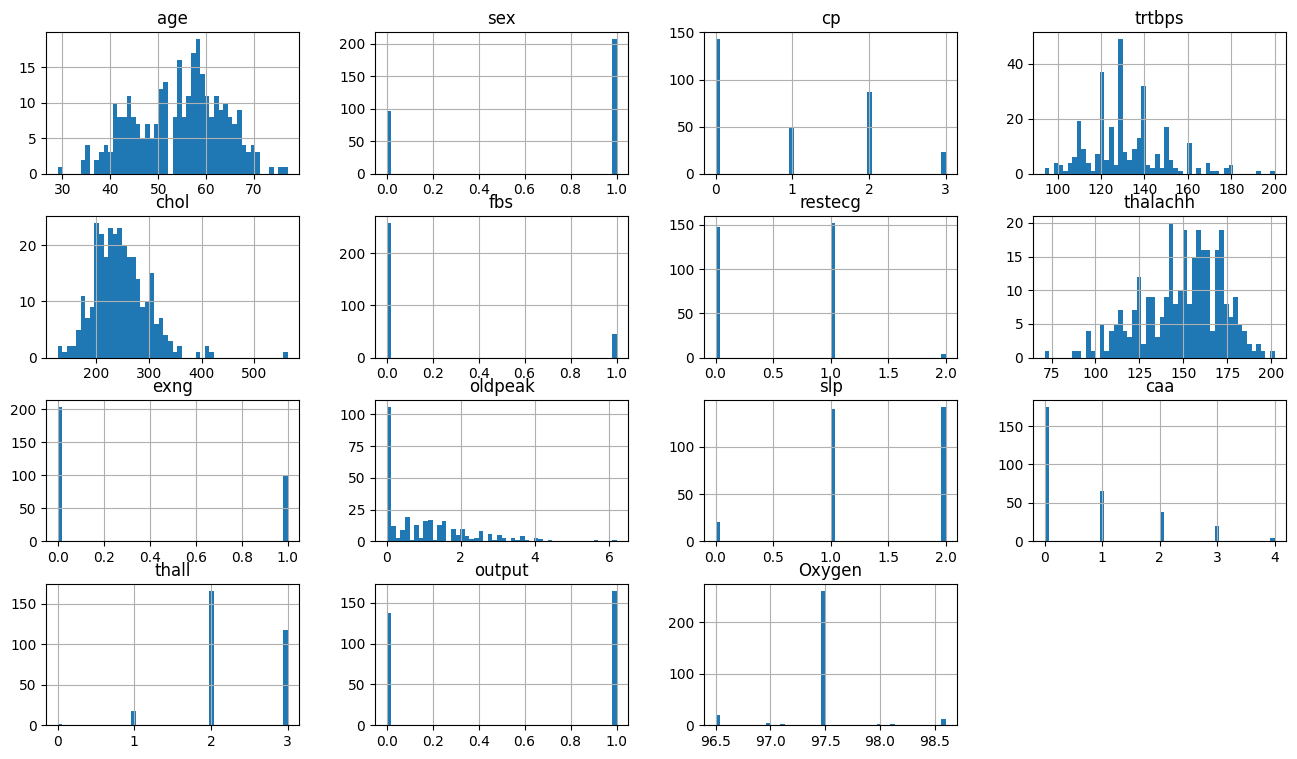

In [122]:
heart.hist(bins=50, figsize=(16,9))

In [123]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Oxygen
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,97.480858
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.346740
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,97.500000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,97.500000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,98.600000


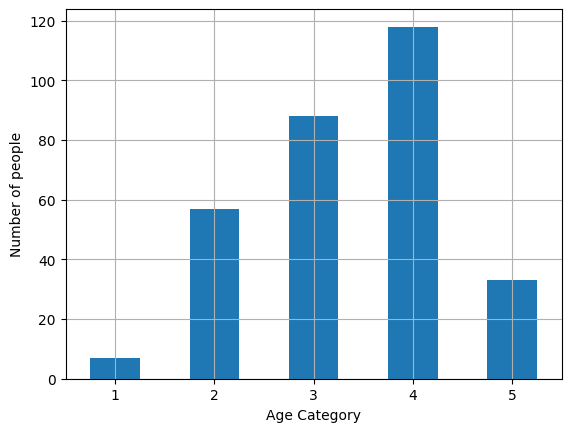

In [124]:
heart["age_cat"] = pd.cut(heart["age"],bins=[25., 35., 45., 55., 65., np.inf],labels=[1, 2, 3, 4, 5])
#Gelir değerlerini 1'den 5'e kadar numaralarla isimlendirdiğimiz beş eşit aralıklı kategoriye böldük
heart["age_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Age Category")
plt.ylabel("Number of people")
plt.show()

In [125]:
corr_matrix = heart.corr()
corr_matrix["output"].sort_values(ascending=False)

C:\Users\yusuf\AppData\Local\Temp\ipykernel_2272\4258079020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = heart.corr()


output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
Oxygen      0.309337
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

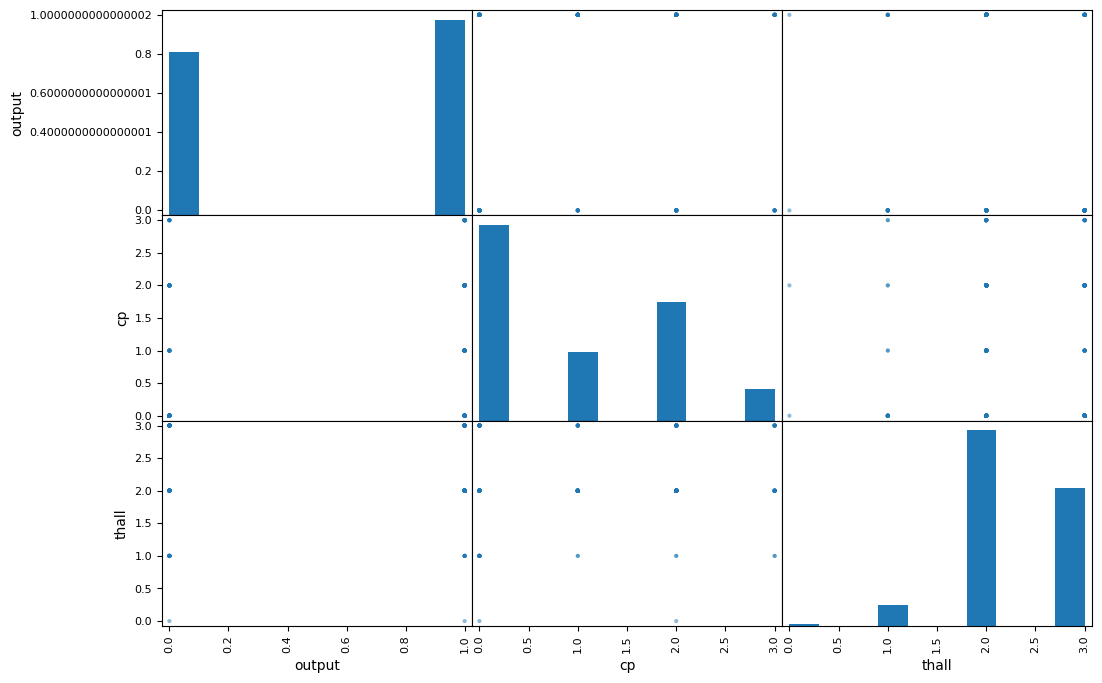

In [126]:
from pandas.plotting import scatter_matrix

attributes = ["output", "age_cat", "cp", "thall"]
scatter_matrix(heart[attributes], figsize=(12, 8))
plt.show()

In [127]:
df = heart
df = df.drop(["age"], axis=1)
cat_cols =["age_cat",'sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["trtbps","chol","thalachh","oldpeak", "Oxygen"]
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)
X = df.drop(['output'],axis=1)
y = df[['output']]
                    

In [128]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,trtbps,chol,thalachh,oldpeak,Oxygen,age_cat_2,age_cat_3,age_cat_4,age_cat_5,sex_1,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.75,-0.110236,-0.092308,0.9375,1.1,0,0,1,0,1,...,0,1,1,0,0,0,0,1,0,0
1,0.00,0.157480,1.046154,1.6875,1.1,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
2,0.00,-0.566929,0.584615,0.3750,1.1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,-0.50,-0.062992,0.769231,0.0000,0.6,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,-0.50,1.795276,0.307692,-0.1250,0.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [131]:
from sklearn.model_selection import train_test_split
heart = heart.dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=heart["age_cat"], random_state=42)
#bu fonksiyon hem kategorize etmeye hem de test setine bölmemize yarıyor, test setinin genel seti kategorilerin oranı
#açısından yansıtmak önemli

In [132]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.9180327868852459


C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
